1. CLEAN DATA from SPOTIFY

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#merge 6 datasets

# get dataset from https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks


df60 = pd.read_csv('Spotify Data/dataset-of-60s.csv')
df70 = pd.read_csv('Spotify Data/dataset-of-70s.csv')
df80 = pd.read_csv('Spotify Data/dataset-of-80s.csv')
df90 = pd.read_csv('Spotify Data/dataset-of-90s.csv')
df00 = pd.read_csv('Spotify Data/dataset-of-00s.csv')
df10 = pd.read_csv('Spotify Data/dataset-of-10s.csv')



df = pd.concat([df60, df70, df80, df90, df00, df10], ignore_index=True)
#df.drop(['uri', 'track', 'artist'], axis=1, inplace=True) --> TO BE DECIDE

print(df.head())

                   track            artist  \
0  Jealous Kind Of Fella     Garland Green   
1          Initials B.B.  Serge Gainsbourg   
2           Melody Twist       Lord Melody   
3          Mi Bomba Sonó        Celia Cruz   
4            Uravu Solla       P. Susheela   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:1dtKN6wwlolkM8XZy2y9C1         0.417   0.620    3    -7.727   
1  spotify:track:5hjsmSnUefdUqzsDogisiX         0.498   0.505    3   -12.475   
2  spotify:track:6uk8tI6pwxxdVTNlNOJeJh         0.657   0.649    5   -13.392   
3  spotify:track:7aNjMJ05FvUXACPWZ7yJmv         0.590   0.545    7   -12.058   
4  spotify:track:1rQ0clvgkzWr001POOPJWx         0.515   0.765   11    -3.515   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0403         0.490          0.000000    0.0779    0.845   
1     1       0.0337         0.018          0.107000    0.1760    0.797   
2     1       0.0

In [10]:
# for i, decade in enumerate([1960, 1970, 1980, 1990, 2000, 2010]):
#     datas[i]['decade'] = pd.Series(decade, index=datas[i].index)

# data = pd.concat(datas, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)

NameError: name 'datas' is not defined

In [ ]:
#fetch data from kaggle https://www.kaggle.com/datasets/theoverman/the-spotify-hit-predictor-dataset



1    4321
0    4321
Name: target, dtype: int64


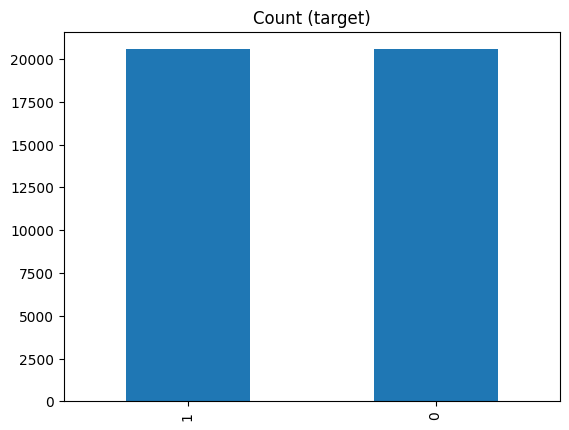

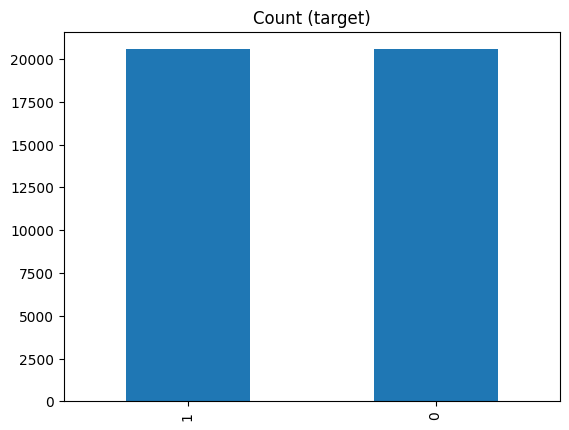

In [11]:
# count values of target variable called target of df
print(df['target'].value_counts())

# histogram of target variable
df['target'].value_counts().plot(kind='bar', title='Count (target)');
plt.show()
